   Head Size(cm^3)  Brain Weight(grams)
0             4512                 1530
1             3738                 1297
2             4261                 1335
3             3777                 1282
4             4177                 1590
       Head Size(cm^3)  Brain Weight(grams)
count       237.000000           237.000000
mean       3633.991561          1282.873418
std         365.261422           120.340446
min        2720.000000           955.000000
25%        3389.000000          1207.000000
50%        3614.000000          1280.000000
75%        3876.000000          1350.000000
max        4747.000000          1635.000000
Shape of X: (237,)
Shape of Y: (237,)
Mean of X: 3633.9915611814345
Mean of Y: 1282.873417721519
Calculated coefficients:
b1 (slope): 0.2634293394893993
b0 (intercept): 325.5734210494428


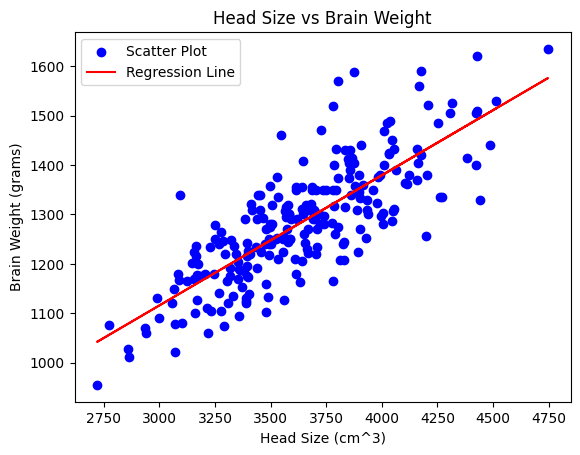

Root Mean Square Error (RMSE): 72.1206213783709
R² Score: 0.639311719957
Head Size: 3000 cm^3 -> Predicted Brain Weight: 1115.86 grams
Head Size: 3500 cm^3 -> Predicted Brain Weight: 1247.58 grams
Head Size: 4000 cm^3 -> Predicted Brain Weight: 1379.29 grams
Head Size: 4500 cm^3 -> Predicted Brain Weight: 1511.01 grams
Head Size: 3000 cm^3 -> Predicted Brain Weight: 1115.86 grams -> Error: -0.99 grams
Head Size: 3500 cm^3 -> Predicted Brain Weight: 1247.58 grams -> Error: 0.27 grams
Head Size: 4000 cm^3 -> Predicted Brain Weight: 1379.29 grams -> Error: -2.74 grams
Head Size: 4500 cm^3 -> Predicted Brain Weight: 1511.01 grams -> Error: 6.93 grams


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('headbrain.csv')

# Take the last two columns: Head Size(cm3) and Brain Weight(grams)
XY = data.iloc[:, 2:4]

# Display the first few rows
print(XY.head())

# Display statistical summary
print(XY.describe())

# Separate X and Y
X = XY['Head Size(cm^3)'].values
Y = XY['Brain Weight(grams)'].values

# Print the shape of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# Calculate the mean of X and Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

print("Mean of X:", mean_X)
print("Mean of Y:", mean_Y)

# Calculate the coefficients b1 and b0
numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sum((X - mean_X) ** 2)

b1 = numerator / denominator
b0 = mean_Y - (b1 * mean_X)

print("Calculated coefficients:")
print("b1 (slope):", b1)
print("b0 (intercept):", b0)

# Calculate the predicted Y values
Y_pred = b0 + b1 * X

# Display the regression line
plt.scatter(X, Y, color="blue", label="Scatter Plot")
plt.plot(X, Y_pred, color="red", label="Regression Line")
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.title('Head Size vs Brain Weight')
plt.show()

# Calculate the RMSE
rmse = np.sqrt(np.mean((Y - Y_pred) ** 2))
print("Root Mean Square Error (RMSE):", rmse)

# Calculate the R² score
ss_total = np.sum((Y - mean_Y) ** 2)
ss_residual = np.sum((Y - Y_pred) ** 2)
r2_score = 1 - (ss_residual / ss_total)
print("R² Score:", r2_score)

# Randomly selected Head Size values (in cm^3)
random_head_sizes = [3000, 3500, 4000, 4500]

# Predicting Brain Weight using the regression equation
predicted_brain_weights = b0 + b1 * np.array(random_head_sizes)

# Display the results
for i in range(len(random_head_sizes)):
    print(f"Head Size: {random_head_sizes[i]} cm^3 -> Predicted Brain Weight: {predicted_brain_weights[i]:.2f} grams")

# Simulate true brain weights by adding some random noise to the predicted values
true_brain_weights = predicted_brain_weights + np.random.normal(0, 5, len(predicted_brain_weights))  # adding noise with mean 0 and standard deviation 5

# Calculate the error as the difference between predicted and true values
errors = predicted_brain_weights - true_brain_weights

# Display the errors
for i in range(len(random_head_sizes)):
    print(f"Head Size: {random_head_sizes[i]} cm^3 -> Predicted Brain Weight: {predicted_brain_weights[i]:.2f} grams -> Error: {errors[i]:.2f} grams")
